# Hotel Booking - Atharva Rodge

### Importing necessary libraries

In [19]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_dataset = pd.read_csv("hotel_bookings.csv")
project_dataset.head() # returns top five data by index
# df.tail() # tail returns last five data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,07/03/2015


In [3]:
project_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Cleaning data

In [4]:
project_dataset.shape ## gives no of rows and columns

(119390, 30)

In [5]:
# Removing NA values
project_dataset.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [6]:
def clean(project_dataset):
    project_dataset.fillna(0, inplace = True) ## zero in place of null values
    print(project_dataset.isnull().sum())

In [7]:
clean(project_dataset)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [8]:
project_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
list_column = ["children", "adults", "babies"]

for i in list_column:
    print(f"{i} has unique values as {project_dataset[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [10]:
# data cleaning
filter_data = (project_dataset['children'] == 0) & (project_dataset['adults'] == 0) & (project_dataset['babies'] == 0)
final_data = project_dataset[~filter_data] #filter it out


In [11]:
project_dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,07/03/2015


In [12]:
final_data.shape

(119210, 30)

# Guest Location

In [14]:
country_wise_data = final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index() # booking not canceled and geust came to the hotel
country_wise_data.columns = ["Country","No of Geust"]
print(country_wise_data)

    Country  No of Geust
0       PRT        20977
1       GBR         9668
2       FRA         8468
3       ESP         6383
4       DEU         6067
..      ...          ...
161     BHR            1
162     DJI            1
163     MLI            1
164     NPL            1
165     FRO            1

[166 rows x 2 columns]


# Guests pay

In [15]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
final_data["adr"]

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119210, dtype: float64

In [21]:
data = final_data[final_data["is_canceled"] == 0]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,07/03/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,09/06/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,09/07/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,09/07/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,09/07/2017


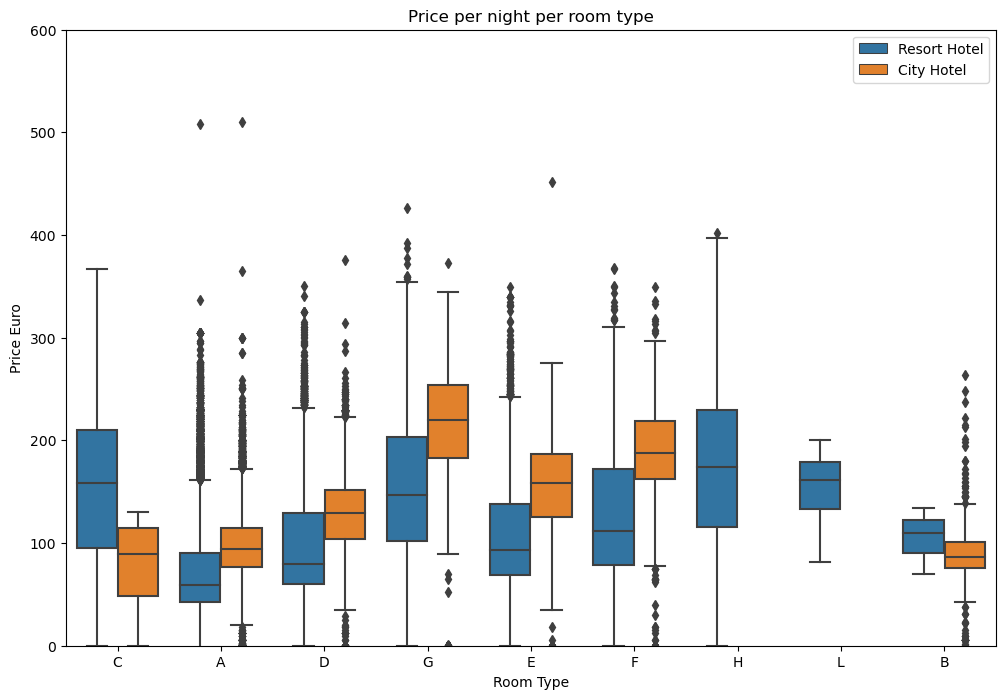

In [20]:
#boxplot 
plt.figure(figsize = (12,8))
sns.boxplot(x = "reserved_room_type", y = "adr" , hue="hotel", data = data)
plt.title("Price per night per room type")
plt.xlabel("Room Type")
plt.ylabel("Price Euro")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.show()


# Variation of price (adr) per night over the year

In [22]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [23]:
data_resort = final_data[(final_data["hotel"]== "Resort Hotel") & (final_data["is_canceled"]==0)] 
data_city = final_data[(final_data["hotel"]== "City Hotel") & (final_data["is_canceled"]==0)]



In [24]:
# resort hotel var : data_resort

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index() 

city_hotel.columns = ["Arrival Month","Price"]
resort_hotel.columns = ["Arrival Month","Price"]


In [25]:
final = resort_hotel.merge(city_hotel, on = "Arrival Month")

final.columns = ["Arrival Month","Resort Hotel Price","City Hotel Price"]
print(final)


   Arrival Month  Resort Hotel Price  City Hotel Price
0          April           75.867816        111.962267
1         August          181.205892        118.674598
2       December           68.410104         88.401855
3       February           54.147478         86.520062
4        January           48.761125         82.330983
5           July          150.122528        115.818019
6           June          107.974850        117.874360
7          March           57.056838         90.658533
8            May           76.657558        120.669827
9       November           48.706289         86.946592
10       October           61.775449        102.004672
11     September           96.416860        112.776582


# Sorted Month

In [26]:
from calendar import month_name

def sort_month(df, colname):
    month_dict = { j:i for i, j in enumerate(month_name) } #dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)


In [27]:
sort_month(final, 'Arrival Month')

,Arrival Month,Resort Hotel Price,City Hotel Price
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='Arrival Month'>

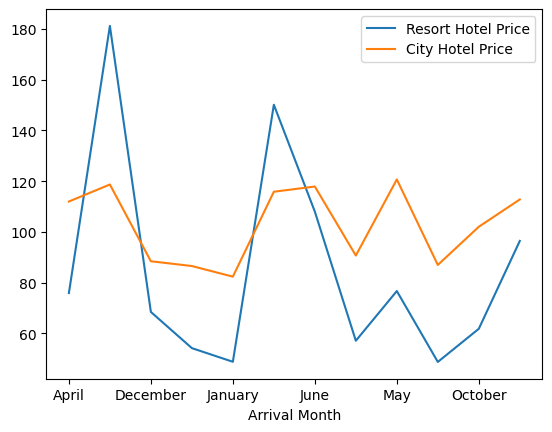

In [28]:
final.plot(kind = "line", x = "Arrival Month", y = ['Resort Hotel Price','City Hotel Price'])

# Most busy month

In [29]:
rush_city = final_data["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ['Month','No of guests']

In [30]:
from calendar import month_name

def sort_month(df, colname):
    month_dict = { j:i for i, j in enumerate(month_name) } #dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)

In [31]:
final_rush_month = sort_month(rush_city, 'Month')
final_rush_month

,Month,No of guests
0,January,5921
1,February,8052
2,March,9768
3,April,11078
4,May,11780
5,June,10929
6,July,12644
7,August,13861
8,September,10500
9,October,11147


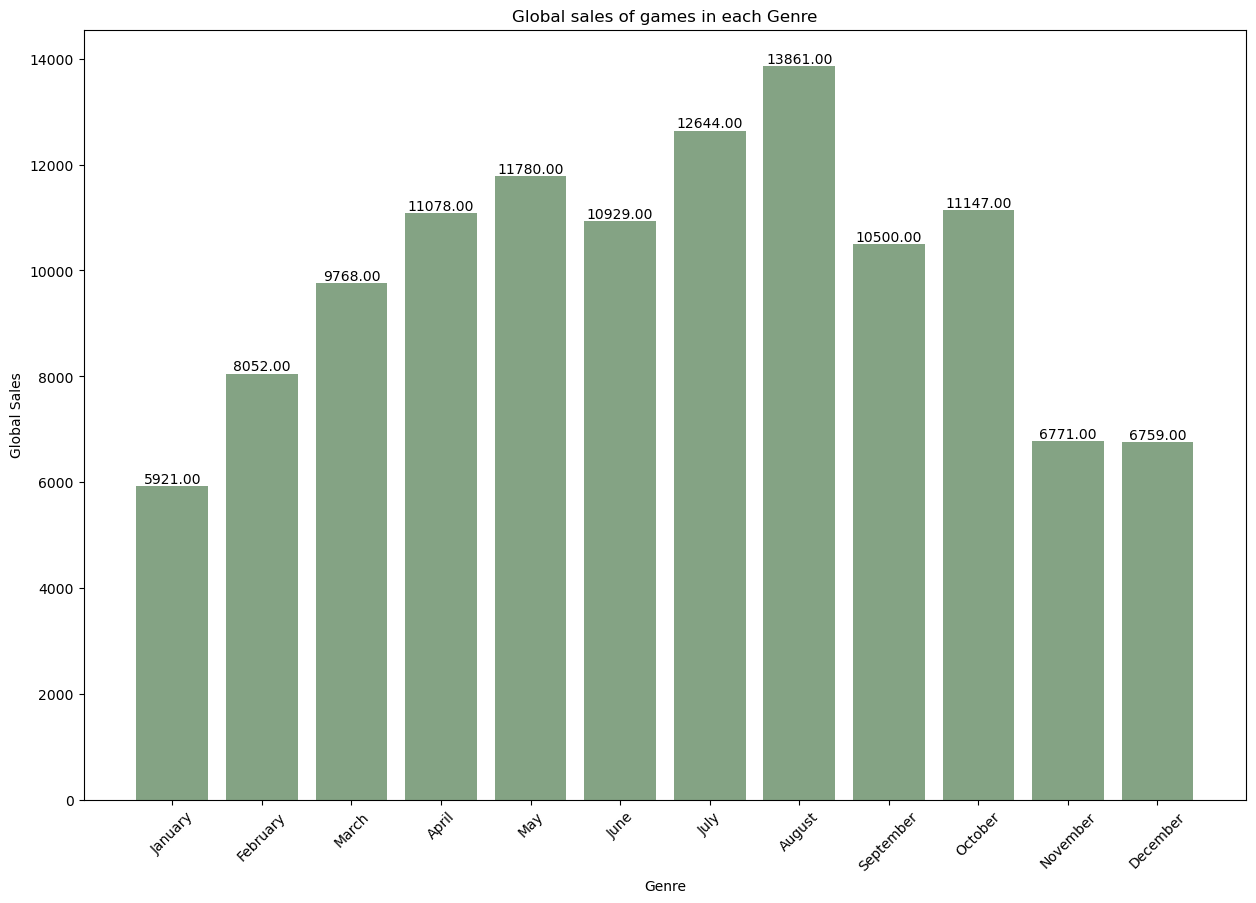

In [32]:
plt.figure(figsize=(15, 10))
bar_plot = plt.bar(final_rush_month['Month'], final_rush_month['No of guests'], color= (0.2, 0.4, 0.2, 0.6))
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Global sales of games in each Genre')
plt.xticks(rotation=45)
plt.bar_label(bar_plot, fmt='%.2f', label_type='edge')
plt.show()

# People stay duration

In [37]:
filter_condition = final_data["is_canceled"] == 0

clean_data = final_data[filter_condition]

clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,07/03/2015


In [38]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

C:\Users\Atharva\AppData\Local\Temp\ipykernel_43104\2600119523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]


In [39]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,07/01/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07/02/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,07/03/2015,2


In [40]:
stay = clean_data.groupby(["total_nights","hotel"]).agg('count').reset_index()
stay = stay.iloc[:,0:3]
print(stay)

    total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]


In [41]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})

In [42]:
print(stay)

    total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]


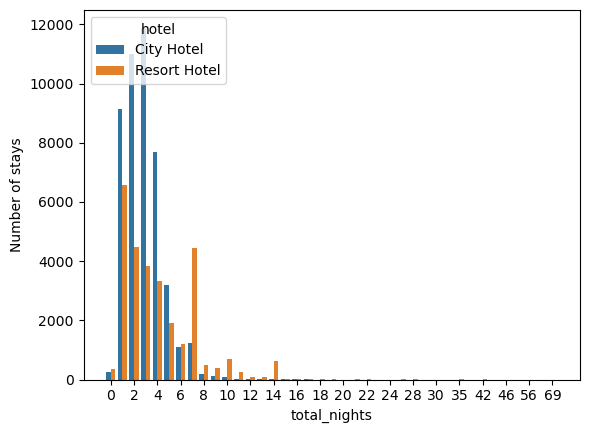

In [43]:
sns.barplot(x="total_nights", y="Number of stays", hue = "hotel",
           hue_order=["City Hotel","Resort Hotel"], data = stay)
plt.locator_params(axis='x', nbins=20) 

# Important Numerical Features using Co-relation

In [44]:
correlation = final_data.corr()

C:\Users\Atharva\AppData\Local\Temp\ipykernel_43104\2010722537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final_data.corr()


In [45]:
correlation = correlation["is_canceled"][1:]

In [46]:
correlation.abs().sort_values(ascending = False )

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [47]:
list_not = ["days_in_waiting_list","arrival_date_year"]

In [48]:
num_features = [col for col in final_data.columns if final_data[col].dtype != 'O' and col not in list_not]

In [49]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


# Select important categorical features

In [50]:
final_data["reservation_status"].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [51]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [52]:
cat_not = ["country","reservation_status","booking_changes","assigned_room_type","days_in_waiting_list"]

In [53]:
cat_features = [col for col in final_data.columns 
                if final_data[col].dtype == "O" and col not in cat_not]

In [54]:
print(cat_features)

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']


In [55]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [56]:
data_cat = final_data[cat_features]

In [57]:
print(data_cat.head())

          hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient              07/01/2015  
1                  C   No Deposit     Transient              07/01/2015  
2                  A   No Deposit     Transient              07/02/2015  
3                  A   No Deposit     Transient              07/02/2015  
4                  A   No Deposit     Transient              07/03/2015  


In [58]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"]= pd.to_datetime(data_cat["reservation_status_date"])

print(data_cat["reservation_status_date"])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119210, dtype: datetime64[ns]


In [59]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [60]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [61]:
data_cat.drop("reservation_status_date", axis = 1 , inplace = True)

In [62]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


# Feature Encoding
## Mean ENcoding Technique

In [63]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [64]:
data_cat["cancellation"] = final_data["is_canceled"]

In [65]:
print(data_cat)

               hotel arrival_date_month meal market_segment  \
0       Resort Hotel               July   BB         Direct   
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
0                    Direct                  C   No Deposit     Transient   
1                    Direct                  C   No Deposit     Transient   
2           

In [67]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")



In [68]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [69]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

In [70]:
num_data = final_data[num_features] #numerical data

cat_data = data_cat #categorical data


dataframe = pd.concat([num_data, cat_data], axis = 1) #final dataframe


In [71]:
print(dataframe.head())

   is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  ...  arrival_date_month  \
0       2       0.0       0                  0  ...            0.374644   
1       2       0.0       0                 

In [72]:
dataframe.describe()["adr"]

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

<Axes: xlabel='lead_time', ylabel='Density'>

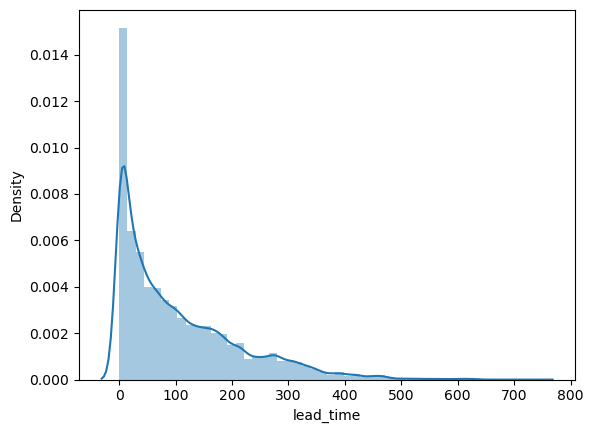

In [73]:
sns.distplot(dataframe["lead_time"])

In [74]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [75]:
handle_outlier("lead_time")

<Axes: xlabel='lead_time', ylabel='Density'>

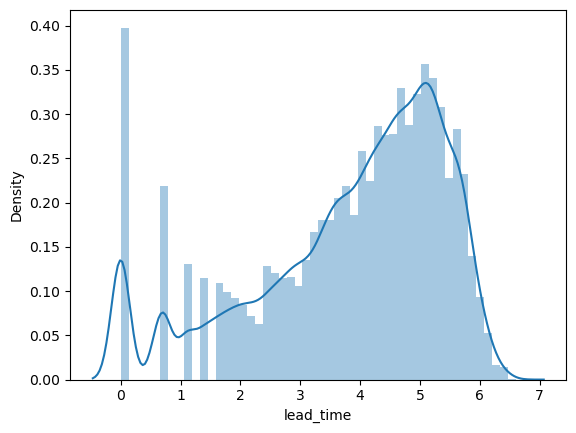

In [76]:
sns.distplot(dataframe["lead_time"].dropna())

<Axes: xlabel='adr', ylabel='Density'>

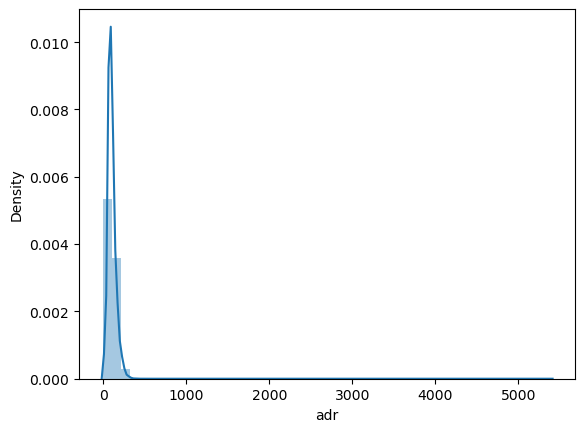

In [77]:
sns.distplot(dataframe["adr"])

In [78]:
handle_outlier("adr")

In [79]:
dataframe.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
dtype: int64

In [80]:
dataframe.dropna(inplace = True)

# Feature Importance

In [81]:

y = dataframe["is_canceled"] #dependent 

X = dataframe.drop("is_canceled", axis = 1) #independent


In [82]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'hotel',
       'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year', 'month',
       'day'],
      dtype='object')

In [83]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [84]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005 , random_state = 0))

In [85]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [86]:
feature_sel_model.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False,  True, False,  True,  True,  True])

In [87]:
cols = X.columns
print(cols)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'hotel',
       'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year', 'month',
       'day'],
      dtype='object')


In [88]:
selected_feature = cols[(feature_sel_model.get_support())]

In [89]:
print(selected_feature)

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'deposit_type', 'year', 'month', 'day'],
      dtype='object')


In [90]:
print(f"Total features {X.shape[1]}")

Total features 26


In [91]:
print(f"Selected features {len(selected_feature)}")

Selected features 14


In [92]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'hotel',
       'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year', 'month',
       'day'],
      dtype='object')

In [93]:
X = X[selected_feature]

In [94]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [95]:
X.head()

,lead_time,arrival_date_week_number,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,year,month,day
0,5.837730,27,2,0.0,0,0,3,0.000000,0,0,0.28402,2015,7,1
1,6.603944,27,2,0.0,0,0,4,0.000000,0,0,0.28402,2015,7,1
2,2.079442,27,1,0.0,0,0,0,4.330733,0,0,0.28402,2015,7,2
3,2.639057,27,1,0.0,0,0,0,4.330733,0,0,0.28402,2015,7,2
4,2.708050,27,2,0.0,0,0,0,4.595120,0,1,0.28402,2015,7,3


In [96]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

# Splitting the data and model building

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 45)

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [100]:
y_pred = logistic_model.predict(x_test)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(y_test, y_pred)

array([[15741,  2941],
       [ 4384,  6737]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test, y_pred)

0.7542193738885347

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [106]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [107]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    #make a predictions
    predictions = model.predict(x_test)
    
    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    
    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))
    
    print("\n")
    
    
    

Naive Bayes
[[ 5861   608]
 [12821 10513]]
0.5494077777404959


Random Forest
[[18558  1223]
 [  124  9898]]
0.9548032077307653


Decision Tree
[[17829   783]
 [  853 10338]]
0.9451061973626816


KNN
[[18551  1385]
 [  131  9736]]
0.9491326376539274


